In [7]:
import numpy as np
import pandas as pd
import scipy 
import cvxpy as cp

# CVXPY 

'''Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=4x_1+2x_2 \\ 
\text{subject to} & 4x_1+3x_2 \leq 12 \\
& -3x_1 + 6x_2 \leq 10 \\
& x_1 \geq 1\\
& 0\leq x_1,\ \ x_2 \leq 5\end{matrix}$$
The expected solution is $z=4.0$ where $x_1=1,\ x_2=0$.
'''

In [8]:


# Define the decision variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the constraints
constraints = [4*x1 + 3*x2 <= 12, -3*x1 + 6*x2 <= 10, x1 >= 1, x2 >= 0, x2 <= 5]

# Define the objective function
obj = cp.Minimize(4*x1 + 2*x2)

# Formulate the problem
prob = cp.Problem(obj, constraints)

# Solve the problem
prob.solve()

# Print the results
print("The optimal value is", prob.value)
print("The optimal x1 is", x1.value)
print("The optimal x2 is", x2.value)

# Expected output:
# The optimal value is 4.0


The optimal value is 4.000000000048357
The optimal x1 is 1.0000000000078193
The optimal x2 is 8.539645891844729e-12


Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=x_1+x_2 \\
\text{subject to } & 4x_1+3x_2 \leq 12\\
& -3x_1+4x_2\leq 12 \\
& 0\leq x_1,\ x_2 \leq 2\end{matrix}$$

In [10]:
# Define the decision variables
x1 = cp.Variable()
x2 = cp.Variable()

# Define the constraints
constraints = [4*x1 + 3*x2 <= 12, -3*x1 + 6*x2 <= 12, x1 >= 0, x2 <= 2]

# Define the objective function
obj = cp.Maximize(x1 + x2)

# Formulate the problem
prob = cp.Problem(obj, constraints)

# Solve the problem
prob.solve()

# Print the results
print("The optimal value is", prob.value)
print("The optimal x1 is", x1.value)
print("The optimal x2 is", x2.value)

# Expected output:
# The optimal value is 4.0

The optimal value is 3.499999999741555
The optimal x1 is 1.5000000006108052
The optimal x2 is 1.9999999991307502


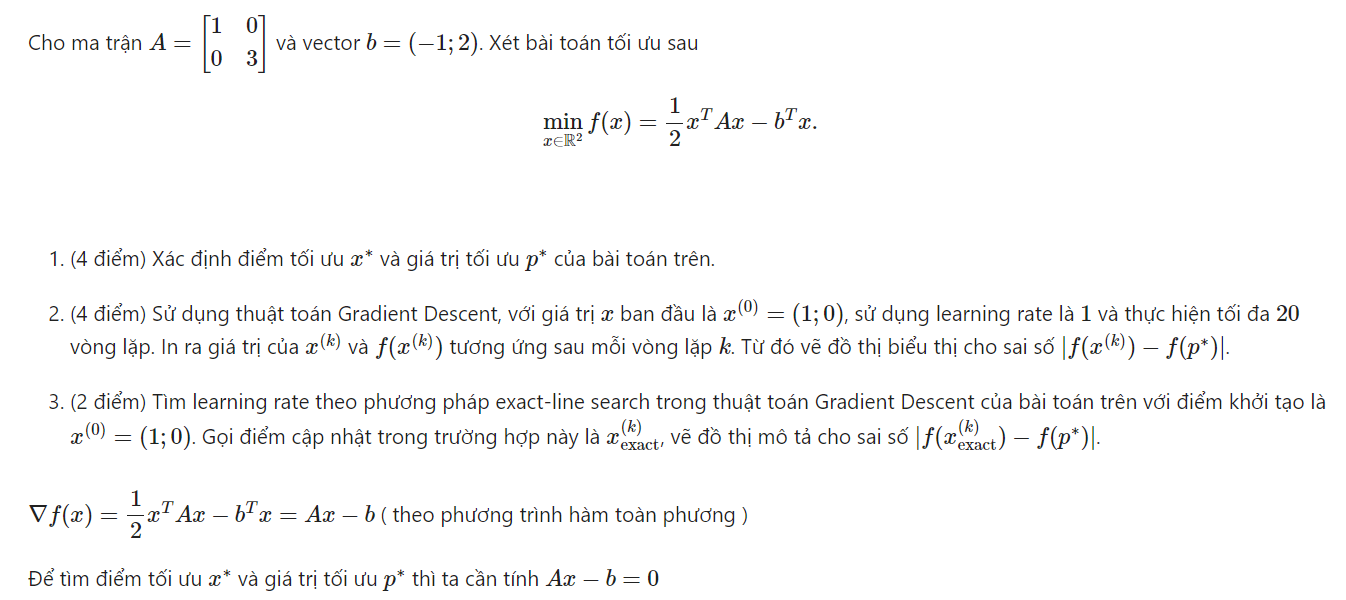

### a)

In [12]:
A = np.array([[1,0],[0,3]])
b = np.array([-1,2])

x = np.linalg.solve(A,b)
f_star = 1/2*x.T@A@x-b.T@x
x,f_star    

(array([-1.        ,  0.66666667]), -1.1666666666666665)

### b)

iter 1 x= [-1  2]   ,  f(x)= 1.5
iter 2 x= [-1 -2]   ,  f(x)= 9.5
iter 3 x= [-1  6]   ,  f(x)= 41.5
iter 4 x= [ -1 -10]   ,  f(x)= 169.5
iter 5 x= [-1 22]   ,  f(x)= 681.5
iter 6 x= [ -1 -42]   ,  f(x)= 2729.5
iter 7 x= [-1 86]   ,  f(x)= 10921.5
iter 8 x= [  -1 -170]   ,  f(x)= 43689.5
iter 9 x= [ -1 342]   ,  f(x)= 174761.5
iter 10 x= [  -1 -682]   ,  f(x)= 699049.5
iter 11 x= [  -1 1366]   ,  f(x)= 2796201.5
iter 12 x= [   -1 -2730]   ,  f(x)= 11184809.5
iter 13 x= [  -1 5462]   ,  f(x)= 44739241.5
iter 14 x= [    -1 -10922]   ,  f(x)= 178956969.5
iter 15 x= [   -1 21846]   ,  f(x)= 715827881.5
iter 16 x= [    -1 -43690]   ,  f(x)= 2863311529.5
iter 17 x= [   -1 87382]   ,  f(x)= 11453246121.5
iter 18 x= [     -1 -174762]   ,  f(x)= 45812984489.5
iter 19 x= [    -1 349526]   ,  f(x)= 183251937961.5
iter 20 x= [     -1 -699050]   ,  f(x)= 733007751849.5
[     -1 -699050]


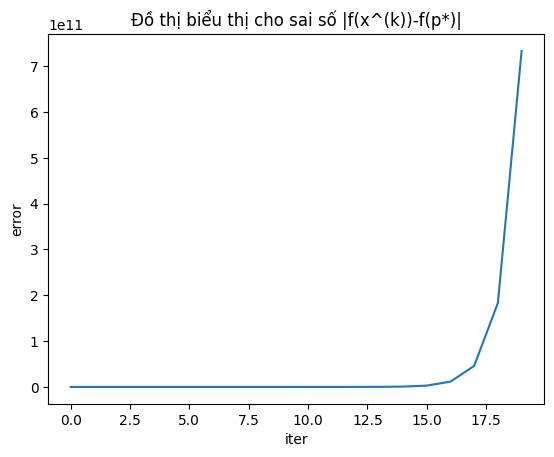

In [13]:
import numpy as np
A = np.array([[1, 0], [0, 3]])
b = np.array([-1, 2])
f_star = -7/6
def f(x):
    return 1/2*x.T@A@x-b.T@x

def grad(x):
    return A@x-b

def gd(x,lr,max_iter):
    for i in range(max_iter):
        x = x-lr*grad(x)
        list_x.append(x)
        print('iter',i+1,'x=',x,'  ,  f(x)=',f(x))
        if np.linalg.norm(grad(x))<1e-3:
            break
    return x

#Khởi tạo vector x
x = np.array([1,0])
iter = 20
lr = 1
list_x = []
x = gd(x,lr,iter)
print(x)
#Vẽ đồ thị biểu thị cho sai số |f(x^(k))-f(p*)|
import matplotlib.pyplot as plt
x = range(len(list_x))
plt.plot(x,[abs(f(i)-f_star) for i in list_x])
plt.xlabel('iter')
plt.ylabel('error')
plt.title('Đồ thị biểu thị cho sai số |f(x^(k))-f(p*)|')
plt.show()